In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
from zero_helpers.imports import * 

In [2]:
from zero_liftsim.simmanager import SimulationManager
from zero_liftsim.helpers import load_asset_template

# Run Simulation

In [3]:
# setup and run simulation
manager = SimulationManager(
    n_agents=10,
    lift_capacity=2,
)
result = manager.run()
print(result)

{'total_rides': 127, 'average_wait': 20.8503937007874, 'agents': [Agent(1) depressed-university 83929c30-18d4-4caa-b8f8-3abc67808764, Agent(2) gruesome-block b08b625e-a9fa-46fd-bc24-f39f9d141f29, Agent(3) wakeful-apple 77cf194f-2feb-498f-be9c-5bf7619dd4a2, Agent(4) knotty-can f3306b63-3beb-4964-b837-662a6f6ad04c, Agent(5) shallow-visit 1fe2ef18-f451-4f57-83da-3eb8f38b59f4, Agent(6) vivacious-name e2c23c9f-9923-4a5a-99c1-736be06b4c05, Agent(7) guttural-string aca4d9b8-4051-42e9-833c-882bddf3bc9f, Agent(8) descriptive-pitch 3b2c559f-e170-4586-ad38-dd3f33692a98, Agent(9) pale-math 350ef5a2-740d-4ef6-9175-4e17a329ae8f, Agent(10) bored-motor 381e608e-4008-4189-8fb3-9f9035026209]}


In [4]:
lift = manager.lift
lift.total_chairs()

1

## Retrieve Data from Simulation

In [5]:
# get rideloop explogs and agent event log
exp_log_data = manager.retrieve_data()
e = exp_log_data['exp_rideloop']
l = exp_log_data['agent_log']

# Visualization

Exception: 

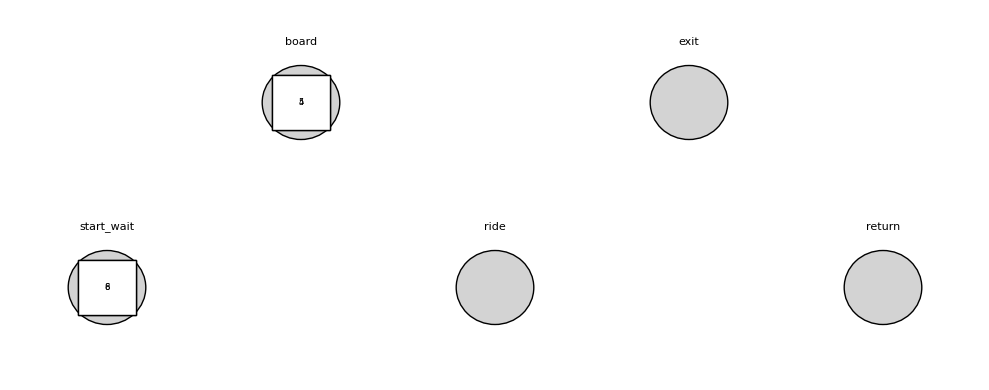

In [8]:
from zero_liftsim import state_viz as stz

x = stz.visualize_states(exp_log_data, pd.to_datetime('2025-03-12 11:57:00'), 
                        out_path='/l/tmp/fig.png')
x

# Sample a Ride Event (from agent log)

In [ ]:
m = l['event'] == 'ride_complete'
event_ride_comp =l[m].sample().iloc[0].to_dict()
event_ride_comp

## retrieve agent from ride event

In [ ]:
a = manager.lookup_agent(event_ride_comp['agent_uuid'])
l = l[l['agent_uuid'] == a.agent_uuid]
a

In [ ]:
l

## retrieve exp log related to event (from exp_rideloop object on agent_exp_log_data)

In [ ]:
idx = (e['time'] - event_ride_comp['time']).dt.total_seconds().abs().idxmin()
exp = e.loc[idx].to_dict()
exp

In [ ]:
a = manager.lookup_agent(event_ride_comp['agent_uuid'])
l = l[l['agent_uuid'] == a.agent_uuid]
a

In [ ]:
t = load_asset_template('agent-ride-exp.md.j2')
print(t.render(exp))

In [ ]:
l['event'].value_counts()

In [ ]:
l